[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 3.23


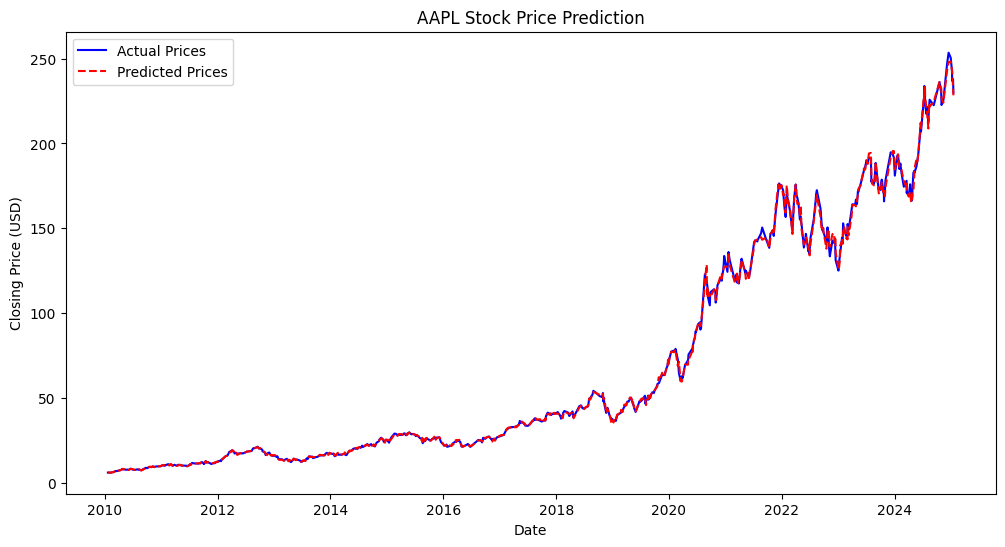

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Download Stock Data
ticker = "AAPL"  # Change to your preferred ticker (e.g., "GOOG", "MSFT")
data = yf.download(ticker, start="2010-01-21", end="2025-01-21")

# Step 3: Prepare the Data
# Use 'Close' price for prediction
data = data[['Close']].dropna()

# Create input features (X) and output target (y)
data['Target'] = data['Close'].shift(-1)  # Predict the next day's price
data = data.dropna()  # Drop the last row (no target value available)

X = data[['Close']]  # Features: Today's closing price
y = data['Target']  # Target: Next day's price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Align Predictions with Actual Data
# Sort the test indices to match the order of actual data
test_indices = X_test.index
y_test_sorted = y_test.loc[test_indices].sort_index()
y_pred_sorted = pd.Series(y_pred, index=test_indices).sort_index()

# Step 8: Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.index, y_test_sorted.values, label='Actual Prices', color='blue')
plt.plot(y_pred_sorted.index, y_pred_sorted.values, label='Predicted Prices', color='red', linestyle='dashed')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Processing AAPL...


Mean Squared Error for AAPL: 3.23

Processing MSFT...


[*********************100%***********************]  1 of 1 completed


Mean Squared Error for MSFT: 12.23

Processing GOOG...


[*********************100%***********************]  1 of 1 completed


Mean Squared Error for GOOG: 3.03


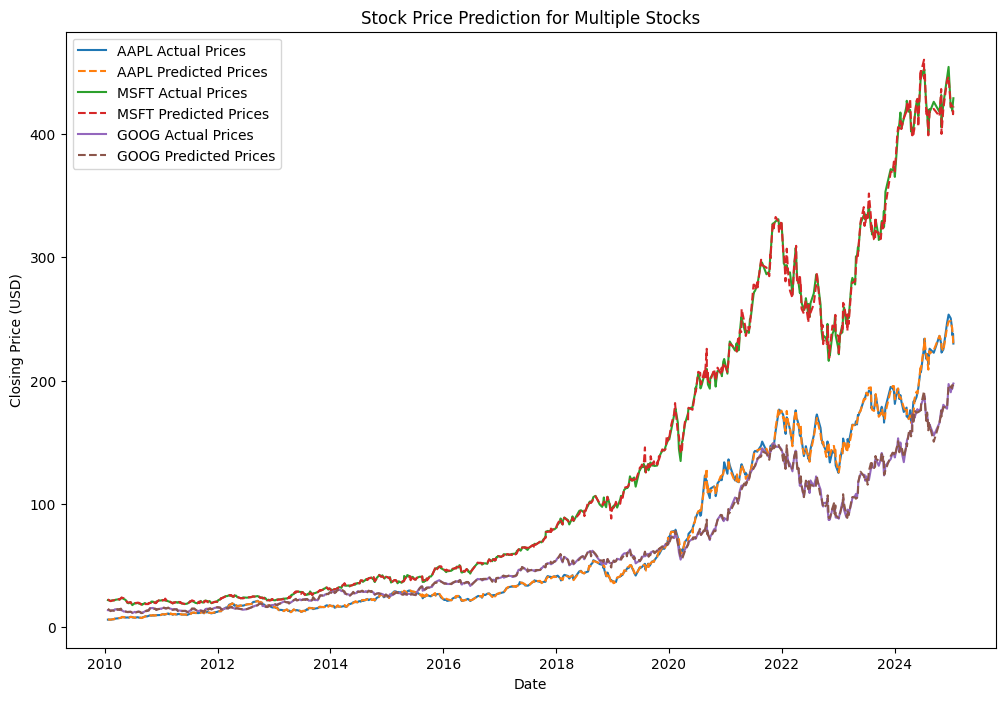

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Define Tickers
tickers = ["AAPL", "MSFT", "GOOG"]  # Add more tickers if you want

# Step 3: Initialize Results Storage
results = {}

# Step 4: Loop Through Each Ticker
for ticker in tickers:
    print(f"\nProcessing {ticker}...")
    
    # Download Stock Data
    data = yf.download(ticker, start="2010-01-21", end="2025-01-21")
    
    # Prepare the Data
    data = data[['Close']].dropna()
    data['Target'] = data['Close'].shift(-1)
    data = data.dropna()
    
    X = data[['Close']]
    y = data['Target']
    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate Model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {ticker}: {mse:.2f}")
    
    # Store Results
    results[ticker] = {
        "y_test": y_test,
        "y_pred": y_pred,
        "mse": mse
    }

# Step 5: Visualize Results
plt.figure(figsize=(12, 8))

for ticker in tickers:
    y_test = results[ticker]["y_test"]
    y_pred = results[ticker]["y_pred"]
    
    # Align predictions with actual data
    test_indices = y_test.index
    y_test_sorted = y_test.loc[test_indices].sort_index()
    y_pred_sorted = pd.Series(y_pred, index=test_indices).sort_index()
    
    # Plot actual vs. predicted prices
    plt.plot(y_test_sorted.index, y_test_sorted.values, label=f'{ticker} Actual Prices', linestyle='solid')
    plt.plot(y_pred_sorted.index, y_pred_sorted.values, label=f'{ticker} Predicted Prices', linestyle='dashed')

plt.title('Stock Price Prediction for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
ticker = "AAPL"  # Change to your preferred ticker (e.g., "GOOG", "MSFT")
data = yf.download(ticker, start="2010-01-21", end="2025-01-21")


[*********************100%***********************]  1 of 1 completed
